In [1]:
# Doing the same as the full data approach, except only training on train data and testing on test data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train = pd.read_csv(r'titanic_train.csv')

In [4]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)

In [7]:
data_train[data_train["Pclass"]==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
check = data_train["Cabin"].str.split(" ", expand = True)
check[check[0].notnull() & check[1].notnull()] 


,0,1,2,3
27,C23,C25,C27,None
75,F,G73,None,None
88,C23,C25,C27,None
97,D10,D12,None,None
118,B58,B60,None,None
128,F,E69,None,None
297,C22,C26,None,None
299,B58,B60,None,None
305,C22,C26,None,None
311,B57,B59,B63,B66


In [9]:
data_train.iloc[27]
# Three rooms are listed for this passenger, so we will just take the first one

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                      19.0
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                    263.0
Cabin                             C23 C25 C27
Embarked                                    S
Name: 27, dtype: object

In [10]:
data_train.dropna(subset=["Cabin"], inplace=True)

In [11]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
data_train.isnull().sum()   

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [13]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [14]:
data_train.drop(["Ticket", "Cabin"], axis=1, inplace=True)

In [15]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

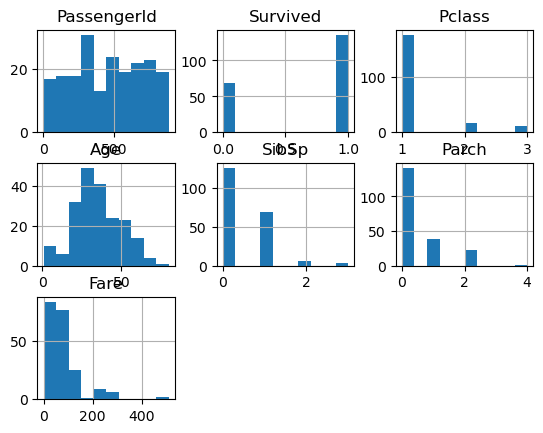

In [16]:
data_train.hist()

In [17]:
data_train["Title"] = data_train["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [18]:
data_train.drop("Name", axis=1, inplace=True)
data_train.drop("PassengerId", axis=1, inplace=True)

In [19]:
data_train["Sex"].replace("male", 1, inplace=True)
data_train["Sex"].replace("female", 0, inplace=True)

In [20]:
data_train.dropna(subset=["Embarked"], inplace=True)

In [21]:
print(data_train.isnull().sum())
print(data_train.info())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  202 non-null    int64  
 1   Pclass    202 non-null    int64  
 2   Sex       202 non-null    int64  
 3   Age       202 non-null    float64
 4   SibSp     202 non-null    int64  
 5   Parch     202 non-null    int64  
 6   Fare      202 non-null    float64
 7   Embarked  202 non-null    object 
 8   Title     202 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 15.8+ KB
None


In [22]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,1,1,0,38.0,1,0,71.2833,C,Mrs
3,1,1,0,35.0,1,0,53.1000,S,Mrs
6,0,1,1,54.0,0,0,51.8625,S,Mr
10,1,3,0,4.0,1,1,16.7000,S,Miss
11,1,1,0,58.0,0,0,26.5500,S,Miss
...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,S,Mrs
872,0,1,1,33.0,0,0,5.0000,S,Mr
879,1,1,0,56.0,0,1,83.1583,C,Mrs
887,1,1,0,19.0,0,0,30.0000,S,Miss


<Axes: >

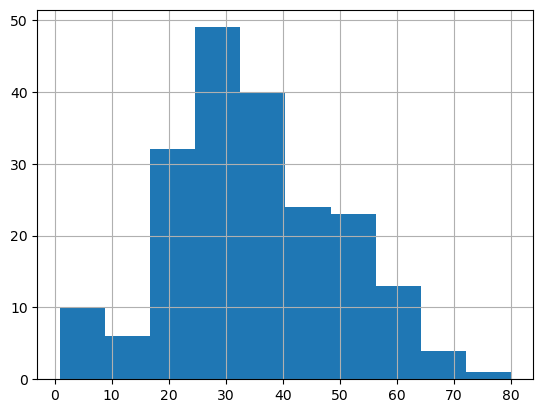

In [23]:
data_train["Age"].hist()

In [24]:
data_test = pd.read_csv(r'titanic_test.csv')

In [25]:
data_test.drop(["Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

In [26]:
data_test["Embarked"].groupby(data_test["Embarked"]).count()

Embarked
C    102
Q     46
S    270
Name: Embarked, dtype: int64

In [27]:
data_test["Embarked"].isnull().sum()

0

In [28]:
data_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [31]:
data_test["Title"] = data_test["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
data_test.drop("Name", axis=1, inplace=True)

In [32]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,Mr
414,1,female,39.0,0,0,108.9000,C,Dona
415,3,male,38.5,0,0,7.2500,S,Mr
416,3,male,NaN,0,0,8.0500,S,Mr


In [33]:
data_test["Sex"].replace("male", 1, inplace=True)
data_test["Sex"].replace("female", 0, inplace=True)

In [36]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,1,1,0,38.0,1,0,71.2833,C,Mrs
3,1,1,0,35.0,1,0,53.1000,S,Mrs
6,0,1,1,54.0,0,0,51.8625,S,Mr
10,1,3,0,4.0,1,1,16.7000,S,Miss
11,1,1,0,58.0,0,0,26.5500,S,Miss
...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,S,Mrs
872,0,1,1,33.0,0,0,5.0000,S,Mr
879,1,1,0,56.0,0,1,83.1583,C,Mrs
887,1,1,0,19.0,0,0,30.0000,S,Miss


In [35]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,Q,Mr
1,3,0,47.0,1,0,7.0000,S,Mrs
2,2,1,62.0,0,0,9.6875,Q,Mr
3,3,1,27.0,0,0,8.6625,S,Mr
4,3,0,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,S,Mr
414,1,0,39.0,0,0,108.9000,C,Dona
415,3,1,38.5,0,0,7.2500,S,Mr
416,3,1,NaN,0,0,8.0500,S,Mr


In [ ]:
# Continued in the main file